<a href="https://colab.research.google.com/github/alanasarah01/SQL_TESTS/blob/main/SQL_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The intend of this workbook is to solve some Intermediate/Medium SQL tests

In order to write SQL queries directly in Python we will use sqlite3 library


In [47]:
import sqlite3
# Establish a connection to an SQLite database (or create a new one)
conn = sqlite3.connect('my_database.db')


To create the tables we will need for the tests we will use pandas library

In [48]:
import pandas as pd


Question 1: Write a query to find the total salary for each department in each building. Include the department, building name, and total salary in the output. Sort the result in ascending order based on the building name and department.

Table: employee
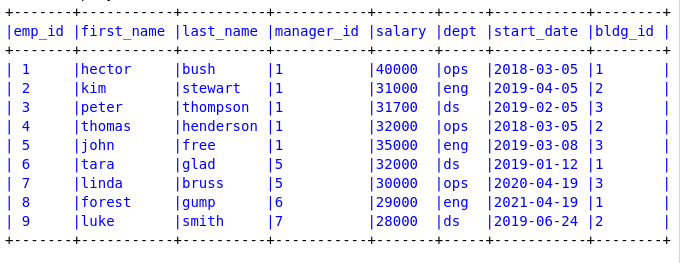


Table: building

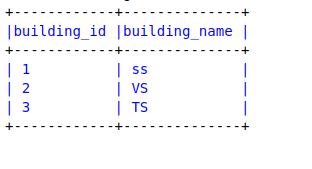



The first step wil be to create those 2 tables in our Python code as follow

In [49]:
# Define the employee table as a DataFrame
employee_data = {
    'emp_id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'first_name': ['hector', 'kim', 'peter', 'thomas', 'john', 'tara', 'linda', 'forest', 'luke'],
    'last_name': ['bush', 'stewart', 'thompson', 'henderson', 'free', 'glad', 'bruss', 'gump', 'smith'],
    'manager_id': [1, 1, 1, 1, 1, 5, 5, 6, 7],
    'salary': [40000, 31000, 31700, 32000, 35000, 32000, 30000, 29000, 28000],
    'dept': ['ops', 'eng', 'ds', 'ops', 'eng', 'ds', 'ops', 'eng', 'ds'],
    'start_date': ['2018-03-05', '2019-04-05', '2019-02-05', '2018-03-05', '2019-03-08', '2019-01-12', '2020-04-19', '2021-04-19', '2019-06-24'],
    'bldg_id': [1, 2, 3, 2, 3, 1, 3, 1, 2]
}

employee_df = pd.DataFrame(employee_data)

# Define the building table as a DataFrame
building_data = {
    'building_id': [1, 2, 3],
    'building_name': ['ss', 'VS', 'TS']
}

building_df = pd.DataFrame(building_data)

# Display the employee table
print("Employee Table:")
print(employee_df)

# Display the building table
print("\nBuilding Table:")
print(building_df)

Employee Table:
   emp_id first_name  last_name  manager_id  salary dept  start_date  bldg_id
0       1     hector       bush           1   40000  ops  2018-03-05        1
1       2        kim    stewart           1   31000  eng  2019-04-05        2
2       3      peter   thompson           1   31700   ds  2019-02-05        3
3       4     thomas  henderson           1   32000  ops  2018-03-05        2
4       5       john       free           1   35000  eng  2019-03-08        3
5       6       tara       glad           5   32000   ds  2019-01-12        1
6       7      linda      bruss           5   30000  ops  2020-04-19        3
7       8     forest       gump           6   29000  eng  2021-04-19        1
8       9       luke      smith           7   28000   ds  2019-06-24        2

Building Table:
   building_id building_name
0            1            ss
1            2            VS
2            3            TS


In [50]:
#Insert DataFrames into the Database:

employee_df.to_sql('employee', conn, if_exists='replace', index=False)
building_df.to_sql('building', conn, if_exists='replace', index=False)

#In the code above, employee_df and building_df are the DataFrames we just created, and we're inserting them into tables named "employee" and "building" in the SQLite database. The if_exists='replace' argument ensures that if the tables already exist, they will be replaced.

3

In [51]:
#Use SQL Magic to Query the Tables:

%reload_ext sql

%sql sqlite:///my_database.db


In [52]:
# Run SQL queries on the tables
result = %sql SELECT * FROM employee
print(result)

   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.
+--------+------------+-----------+------------+--------+------+------------+---------+
| emp_id | first_name | last_name | manager_id | salary | dept | start_date | bldg_id |
+--------+------------+-----------+------------+--------+------+------------+---------+
|   1    |   hector   |    bush   |     1      | 40000  | ops  | 2018-03-05 |    1    |
|   2    |    kim     |  stewart  |     1      | 31000  | eng  | 2019-04-05 |    2    |
|   3    |   peter    |  thompson |     1      | 31700  |  ds  | 2019-02-05 |    3    |
|   4    |   thomas   | henderson |     1      | 32000  | ops  | 2018-03-05 |    2    |
|   5    |    john    |    free   |     1      | 35000  | eng  | 2019-03-08 |    3    |
|   6    |    tara    |    glad   |     5      | 32000  |  ds  | 2019-01-12 |    1    |
|   7    |   linda    |   bruss   |     5      | 30000  | ops  | 2020-04-19 |    3    |
|   8    |   forest   |    gump   |     6      | 29000  | 

 Going back to the question:
 Write a query to find the total salary for each department in each building. Include the department, building name, and total salary in the output. Sort the result in ascending order based on the building name and department.

In [54]:
#Lets start to find the total salary for each department:
%%sql
SELECT dept, sum(salary) FROM employee group by dept

   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


dept,sum(salary)
ds,91700
eng,95000
ops,102000


In [57]:
#Now lets add the building id
%%sql
SELECT dept, bldg_id, sum(salary) FROM employee group by dept, bldg_id

   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


dept,bldg_id,sum(salary)
ds,1,32000
ds,2,28000
ds,3,31700
eng,1,29000
eng,2,31000
eng,3,35000
ops,1,40000
ops,2,32000
ops,3,30000


In [61]:
#Using the SQL lets add the building name joining the other table:
%%sql
SELECT emp.dept, bldg.building_name, sum(salary) as total_salary FROM employee emp
left join building bldg
on emp.bldg_id = bldg.building_id
group by emp.dept, bldg.building_name

   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


dept,building_name,total_salary
ds,TS,31700
ds,VS,28000
ds,ss,32000
eng,TS,35000
eng,VS,31000
eng,ss,29000
ops,TS,30000
ops,VS,32000
ops,ss,40000


In [74]:
#The final step is to sort the result in ascending order based on the building name and department.
%%sql
SELECT emp.dept, bldg.building_name, sum(salary) as total_salary  FROM employee emp
left join building bldg
on emp.bldg_id = bldg.building_id
group by emp.dept, bldg.building_name
order by emp.dept, bldg.building_id asc

   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


dept,building_name,total_salary
ds,ss,32000
ds,VS,28000
ds,TS,31700
eng,ss,29000
eng,VS,31000
eng,TS,35000
ops,ss,40000
ops,VS,32000
ops,TS,30000


# Question 2
Question: Write a SQL query to find the top 3 most popular products in the month of January 2022, in terms of total quantity ordered. Order by quantity ordered DESC.

In [75]:
#Lets create the tables using pandas
import pandas as pd

# Define the tables as DataFrames
users_data = {
    'name': ['John Doe', 'Jane Smith', 'Bob Johnson'],
    'email': ['johndoe@example.com', 'janesmith@example.com', 'bobjohnson@example.com']
}

products_data = {
    'name': ['Product 1', 'Product 2', 'Product 3'],
    'price': [19.99, 29.99, 9.99]
}

orders_data = {
    'user_id': [1, 1, 2, 3],
    'order_date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04']
}

order_items_data = {
    'order_id': [1, 1, 2, 2, 3, 4, 4],
    'product_id': [1, 2, 1, 3, 2, 1, 3],
    'quantity': [2, 1, 1, 3, 2, 3, 1]
}

users_df = pd.DataFrame(users_data)
products_df = pd.DataFrame(products_data)
orders_df = pd.DataFrame(orders_data)
order_items_df = pd.DataFrame(order_items_data)

# Display the contents of the tables
print("Users Table:")
print(users_df)

print("\nProducts Table:")
print(products_df)

print("\nOrders Table:")
print(orders_df)

print("\nOrder Items Table:")
print(order_items_df)


Users Table:
          name                   email
0     John Doe     johndoe@example.com
1   Jane Smith   janesmith@example.com
2  Bob Johnson  bobjohnson@example.com

Products Table:
        name  price
0  Product 1  19.99
1  Product 2  29.99
2  Product 3   9.99

Orders Table:
   user_id  order_date
0        1  2022-01-01
1        1  2022-01-02
2        2  2022-01-03
3        3  2022-01-04

Order Items Table:
   order_id  product_id  quantity
0         1           1         2
1         1           2         1
2         2           1         1
3         2           3         3
4         3           2         2
5         4           1         3
6         4           3         1


In [76]:
#Accessing the data using sqlite3
users_df.to_sql('users', conn, if_exists='replace', index=False)
products_df.to_sql('products', conn, if_exists='replace', index=False)
orders_df.to_sql('orders', conn, if_exists='replace', index=False)
order_items_df.to_sql('orders_items', conn, if_exists='replace', index=False)

7

In [78]:
#Checking if it worked
%%sql
SELECT * FROM users;



   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


name,email
John Doe,johndoe@example.com
Jane Smith,janesmith@example.com
Bob Johnson,bobjohnson@example.com


In [79]:
%%sql
SELECT * FROM products;


   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


name,price
Product 1,19.99
Product 2,29.99
Product 3,9.99


In [80]:
%%sql
SELECT * FROM orders;


   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


user_id,order_date
1,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04


In [81]:
%%sql
SELECT * FROM orders_items

   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


order_id,product_id,quantity
1,1,2
1,2,1
2,1,1
2,3,3
3,2,2
4,1,3
4,3,1


In [83]:
#Using orders_items table, let´s see the product with more product sold
%%sql

SELECT product_id, sum(quantity) as total_quantity FROM orders_items group by product_id


   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


product_id,total_quantity
1,6
2,3
3,4


In [86]:
# we are not able to join the table products once the collumn name is Product followed by product id like: "Product 1", so lets write a sql query to return only the product id
%%sql
SELECT
        DISTINCT name,
        SUBSTR(name, INSTR(name, ' ') + 1) AS product_number
    FROM products

   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


name,product_number
Product 1,1
Product 2,2
Product 3,3


In [89]:
#We can now leverage this query to join the orders_item table, in order total quantanty (and once the question is not clear let's also bring the revenue by product ):
%%sql
SELECT P.name, sum(quantity) as total_quantity, SUM(O.quantity * P.price) AS total_revenue FROM orders_items O
LEFT JOIN (
SELECT
        DISTINCT name, price,
        SUBSTR(name, INSTR(name, ' ') + 1) AS product_number
    FROM products
) P on O.product_id = P.product_number
  group by product_id
ORDER BY total_quantity DESC



   sqlite:///SQLiteMagic.db
 * sqlite:///my_database.db
Done.


name,total_quantity,total_revenue
Product 1,6,119.94
Product 3,4,39.96
Product 2,3,89.97
